# Solving Inventory Inefficiencies Using Advanced SQL Analytics
**Dataset**: inventory_forecasting.csv

This notebook performs end-to-end inventory analytics using SQL-style logic, data visualization, and machine learning.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

In [ ]:

df = pd.read_csv("inventory_forecasting.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0096,Toys,West,158,134,142,152.36,40.88,5,Sunny,1,42.39,Winter
1,2022-01-01,S001,P0016,Clothing,East,189,127,125,150.47,90.78,0,Rainy,0,84.16,Winter
2,2022-01-01,S001,P0031,Electronics,West,75,48,39,68.62,13.99,20,Rainy,0,12.67,Winter
3,2022-01-01,S001,P0159,Electronics,West,161,74,71,75.46,84.92,10,Snowy,0,83.03,Winter
4,2022-01-01,S001,P0129,Furniture,South,135,66,69,67.18,19.66,0,Cloudy,0,20.55,Winter


In [ ]:

df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday


le = LabelEncoder()
for col in ['Store ID', 'Product ID', 'Category', 'Region', 'Weather Condition', 'Seasonality']:
    df[col] = le.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109500 entries, 0 to 109499
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Date                109500 non-null  datetime64[ns]
 1   Store ID            109500 non-null  int32         
 2   Product ID          109500 non-null  int32         
 3   Category            109500 non-null  int32         
 4   Region              109500 non-null  int32         
 5   Inventory Level     109500 non-null  int64         
 6   Units Sold          109500 non-null  int64         
 7   Units Ordered       109500 non-null  int64         
 8   Demand Forecast     109500 non-null  float64       
 9   Price               109500 non-null  float64       
 10  Discount            109500 non-null  int64         
 11  Weather Condition   109500 non-null  int32         
 12  Holiday/Promotion   109500 non-null  int64         
 13  Competitor Pricing  109500 no

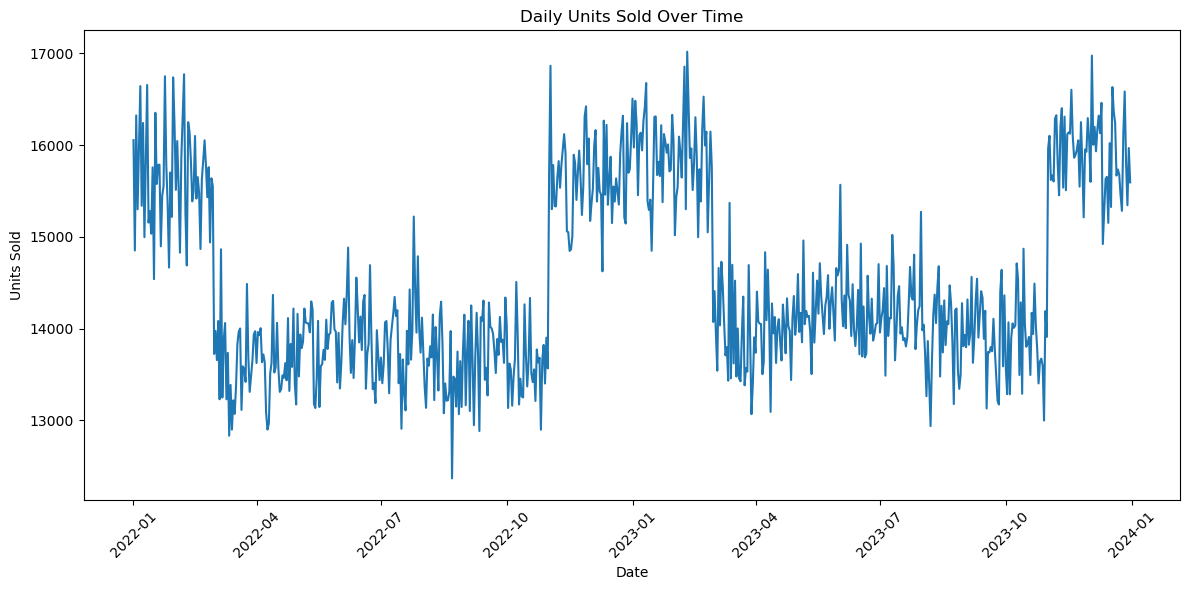

In [ ]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df.groupby('Date')['Units Sold'].sum().reset_index(), x='Date', y='Units Sold')
plt.title("Daily Units Sold Over Time")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

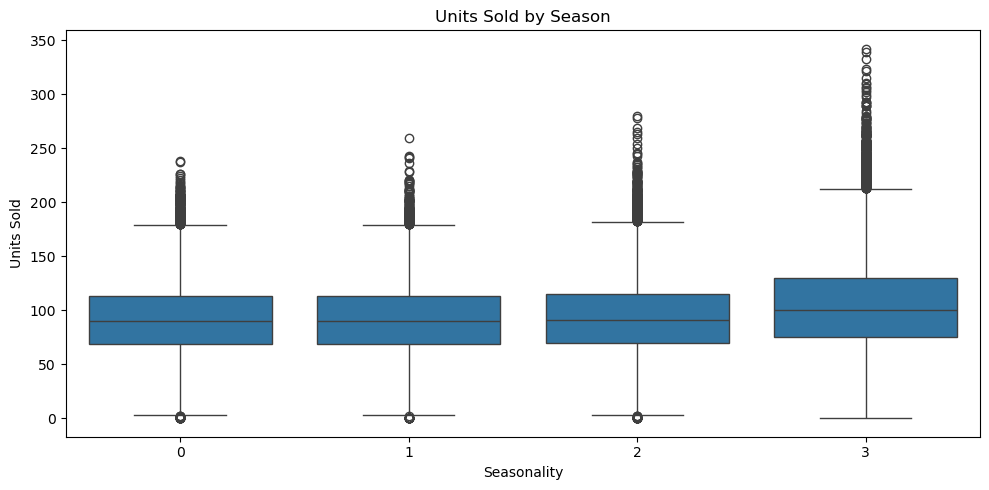

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Seasonality', y='Units Sold')
plt.title("Units Sold by Season")
plt.tight_layout()
plt.show()

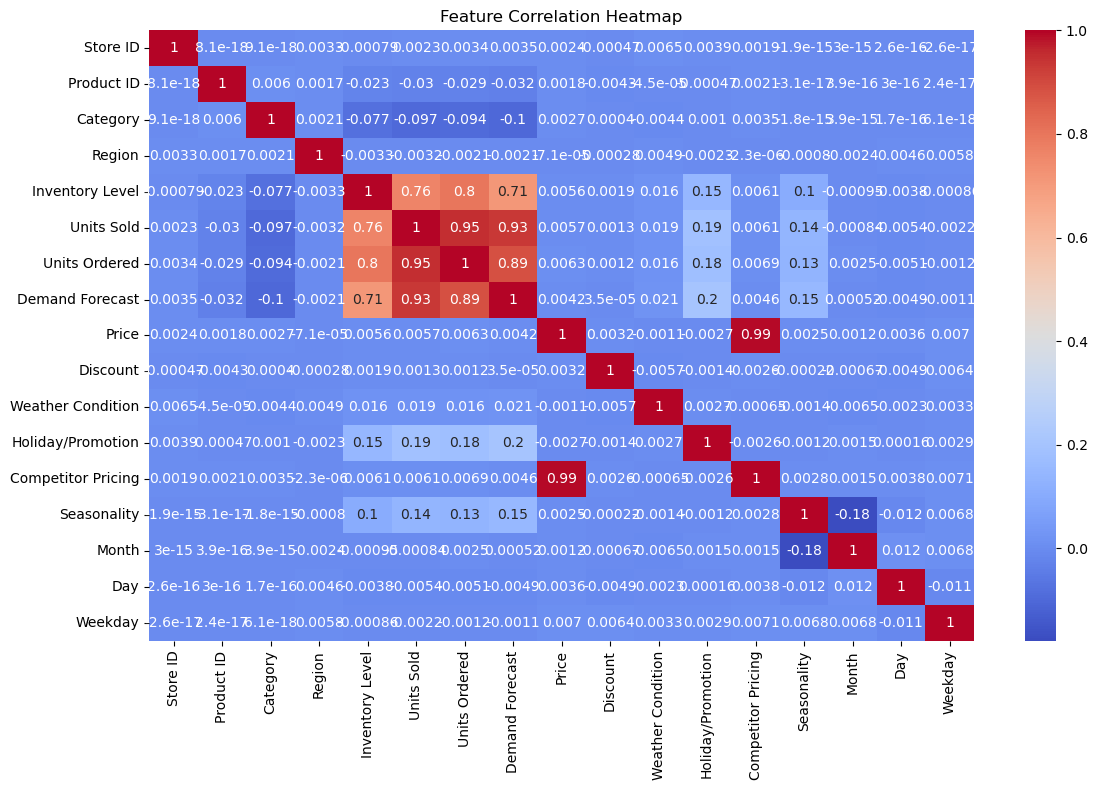

In [ ]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()

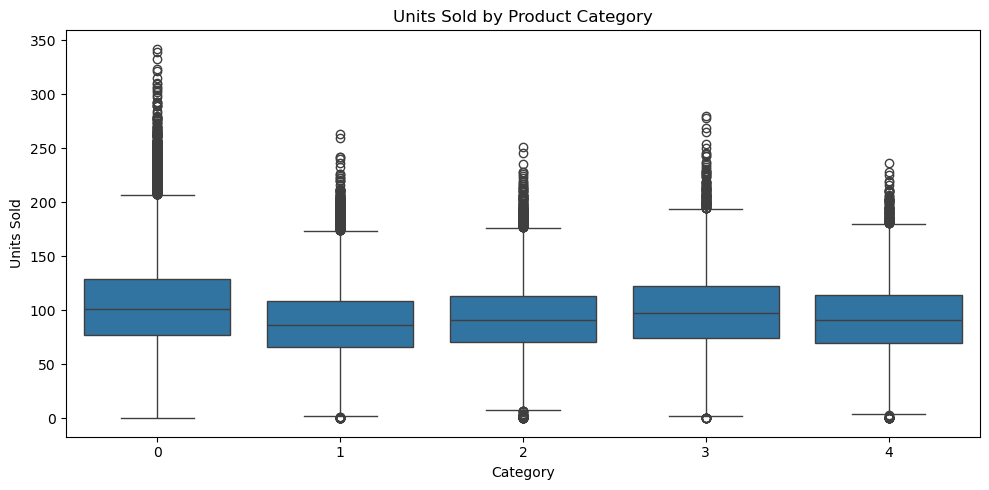

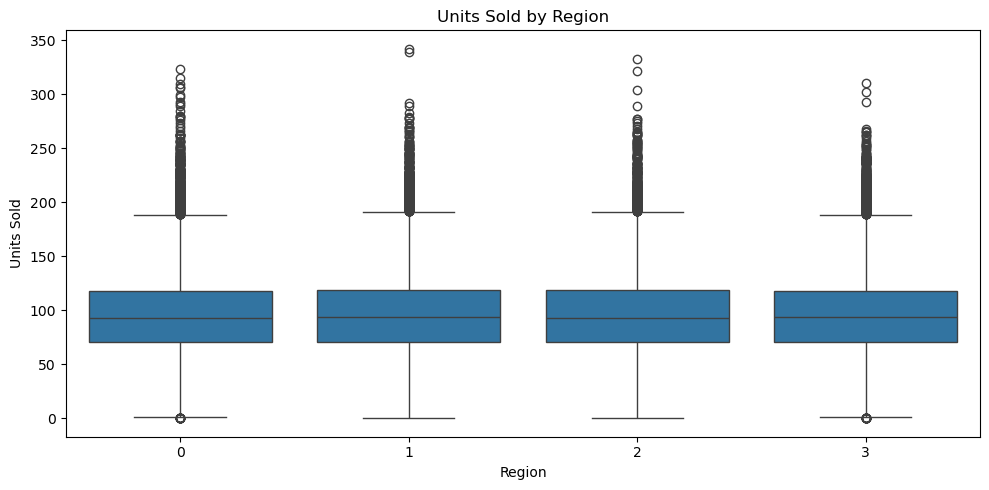

In [ ]:

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Category', y='Units Sold')
plt.title("Units Sold by Product Category")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Region', y='Units Sold')
plt.title("Units Sold by Region")
plt.tight_layout()
plt.show()

In [ ]:

sample_df = df.sample(n=20000, random_state=42)


features = ['Store ID', 'Product ID', 'Category', 'Region', 'Inventory Level',
            'Units Ordered', 'Demand Forecast', 'Price', 'Discount',
            'Weather Condition', 'Holiday/Promotion', 'Competitor Pricing',
            'Seasonality', 'Month', 'Day', 'Weekday']
target = 'Units Sold'

X = sample_df[features]
y = sample_df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 9.39
R² Score: 0.94


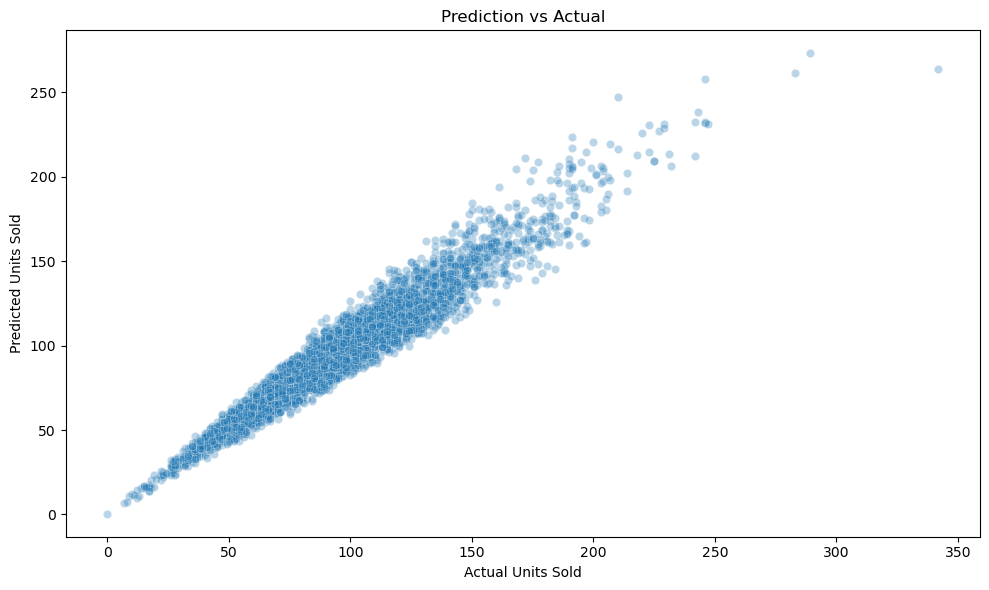

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3)
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Prediction vs Actual")
plt.tight_layout()
plt.show()

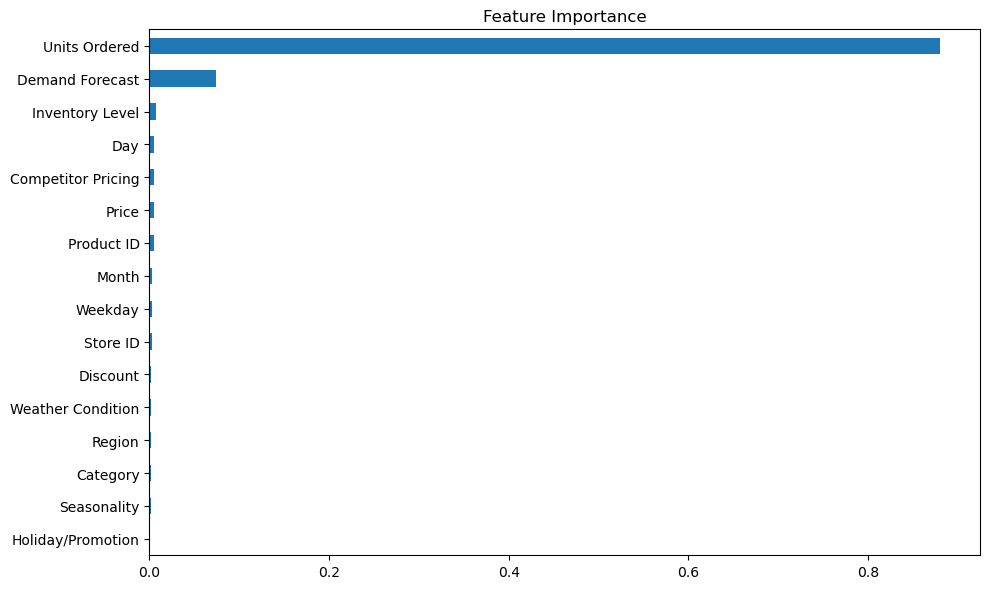

In [ ]:

importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
plt.figure(figsize=(10, 6))
importances.plot(kind='barh')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

## Gradient Boosting Regressor Model
We’ll now apply a Gradient Boosting Regressor to compare performance with the Random Forest model.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score


gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)


gb_pred = gb_model.predict(X_test)


gb_rmse = mean_squared_error(y_test, gb_pred, squared=False)
gb_r2 = r2_score(y_test, gb_pred)

print(f"Gradient Boosting RMSE: {gb_rmse:.2f}")
print(f"Gradient Boosting R² Score: {gb_r2:.2f}")

Gradient Boosting RMSE: 9.17
Gradient Boosting R² Score: 0.94


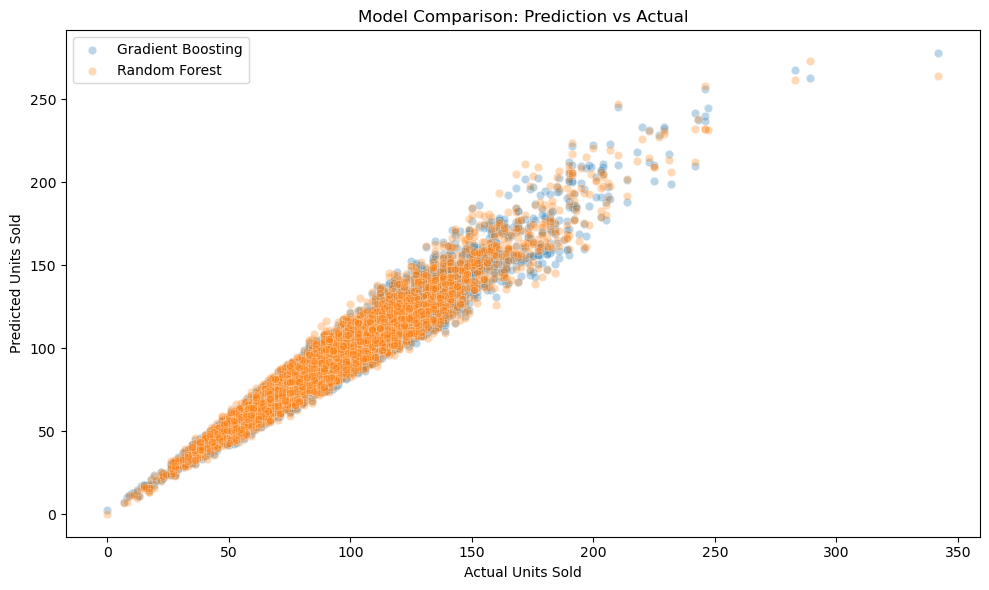

In [ ]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=gb_pred, alpha=0.3, label='Gradient Boosting')
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3, label='Random Forest')
plt.xlabel("Actual Units Sold")
plt.ylabel("Predicted Units Sold")
plt.title("Model Comparison: Prediction vs Actual")
plt.legend()
plt.tight_layout()
plt.show()